In [2]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

LI=load_iris()
df_iris=pd.DataFrame(data=LI.data,columns=LI.feature_names)
df_iris.head(2)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2


<Axes: >

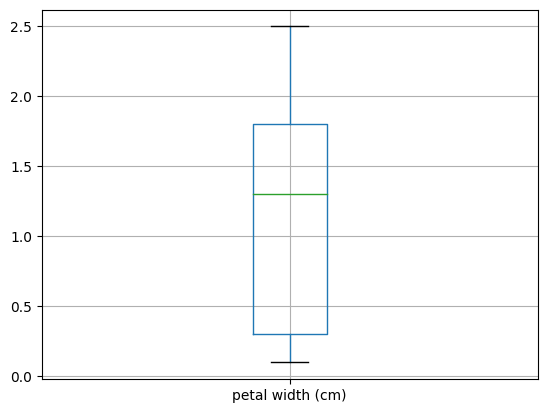

In [3]:
df_iris[['petal width (cm)']].boxplot()

<Axes: >

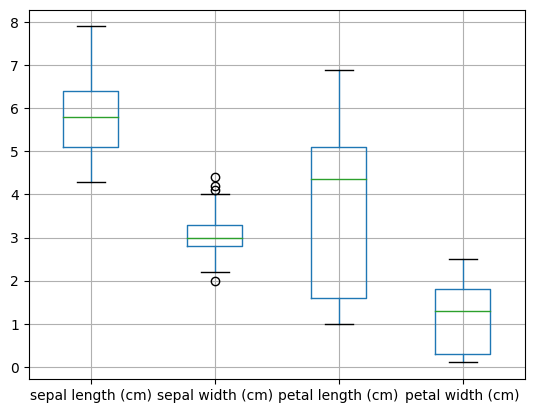

In [4]:
df_iris.boxplot()

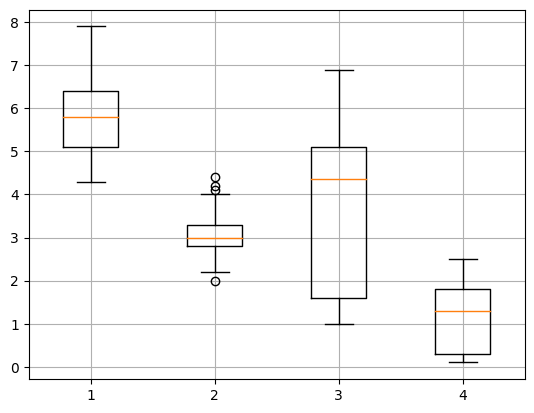

In [5]:
BP=plt.boxplot(df_iris)
plt.grid()

In [6]:
df_iris.skew()

sepal length (cm)    0.314911
sepal width (cm)     0.318966
petal length (cm)   -0.274884
petal width (cm)    -0.102967
dtype: float64

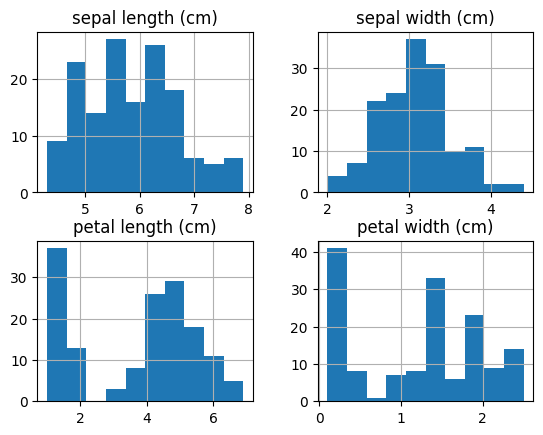

In [7]:
H = df_iris.hist()

##Cuántos datos atípicos tenemos

In [8]:
#Calculamos los cuartiles
Q=df_iris.quantile([0.25,0.75])
#Calculamos el rango intercuartílico
iqr=Q.loc[0.75]-Q.loc[0.25]
iqr

sepal length (cm)    1.3
sepal width (cm)     0.5
petal length (cm)    3.5
petal width (cm)     1.5
dtype: float64

In [9]:
#Límites para los datos atípicos
Li=Q.loc[0.25]-1.5*iqr #Límite inferior
Li

sepal length (cm)    3.15
sepal width (cm)     2.05
petal length (cm)   -3.65
petal width (cm)    -1.95
dtype: float64

In [11]:
Ls=Q.iloc[1]+1.5*iqr #Límite superior
Ls

sepal length (cm)     8.35
sepal width (cm)      4.05
petal length (cm)    10.35
petal width (cm)      4.05
dtype: float64

In [16]:
VF=(Li>df_iris)|(Ls<df_iris)
VF

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
145,False,False,False,False
146,False,False,False,False
147,False,False,False,False
148,False,False,False,False


In [17]:
VF.sum()

sepal length (cm)    0
sepal width (cm)     4
petal length (cm)    0
petal width (cm)     0
dtype: int64

##Cuáles son los valores atípicos

In [19]:
df_iris[VF.values]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
15,5.7,4.4,1.5,0.4
32,5.2,4.1,1.5,0.1
33,5.5,4.2,1.4,0.2
60,5.0,2.0,3.5,1.0


In [21]:
df_iris[VF.values]['sepal width (cm)']

15    4.4
32    4.1
33    4.2
60    2.0
Name: sepal width (cm), dtype: float64